Steven C Michael

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset ini berisi informasi numerik tentang pisang dengan kualitas yang berbeda-beda (ukuran, berat, tingkat kemanisan, kelembutan, waktu panen, tingkat kematangan, keasaman, dan kualitas).

https://www.kaggle.com/datasets/l3llff/banana

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [39]:
df = pd.read_csv('/content/banana_quality.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Melihat 10 baris pertama

In [40]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Mengecek type data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


Mengecek statistik data

In [42]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


Mengecek data null

In [46]:
df.isnull().sum()

,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


Mengecek data duplikat

In [43]:
df.duplicated().sum()

np.int64(0)

mengecek outlier

In [44]:
def count_outliers(df):
  outlier_counts = {}
  for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
  return outlier_counts

outlier_counts = count_outliers(df)
print("Jumlah outlier per kolom:")
outlier_counts

Jumlah outlier per kolom:


{'Size': 36,
 'Weight': 3,
 'Sweetness': 178,
 'Softness': 9,
 'HarvestTime': 58,
 'Ripeness': 58,
 'Acidity': 17}

Membuat boxplot

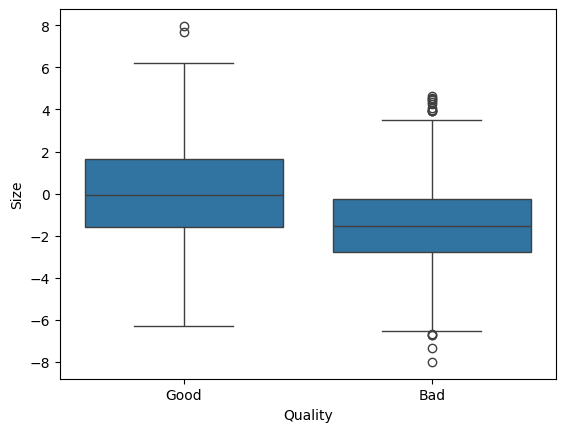

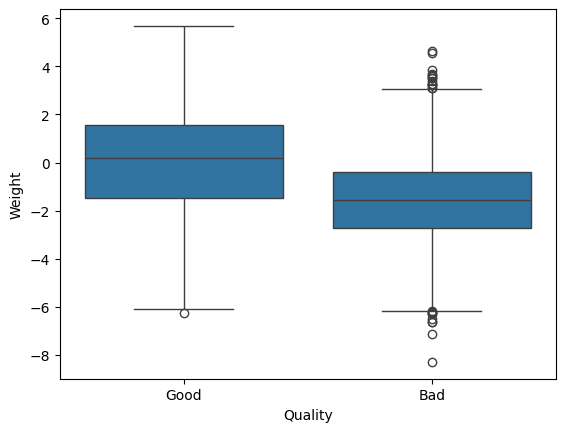

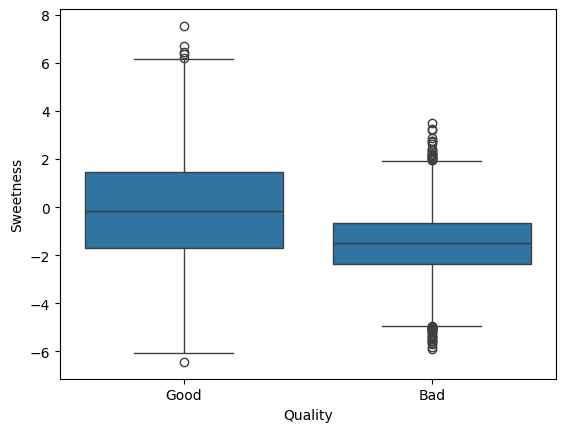

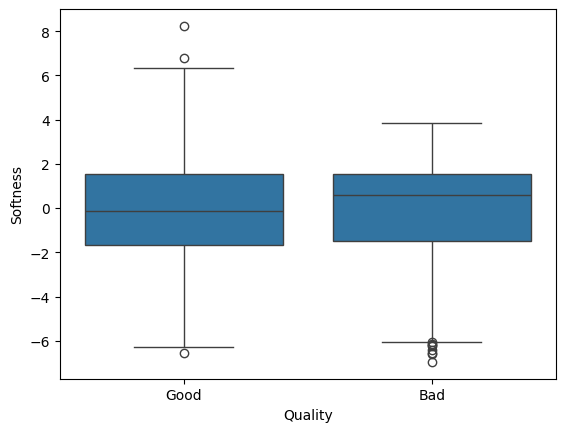

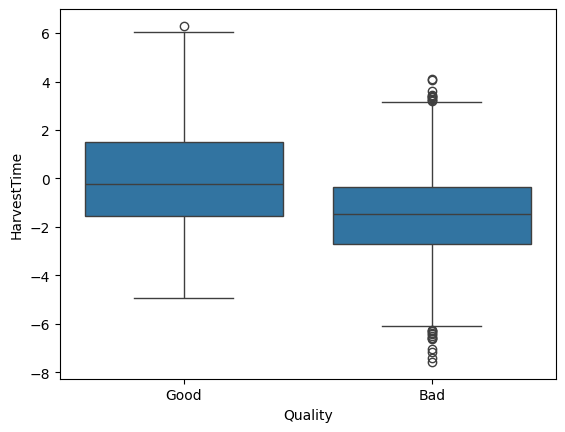

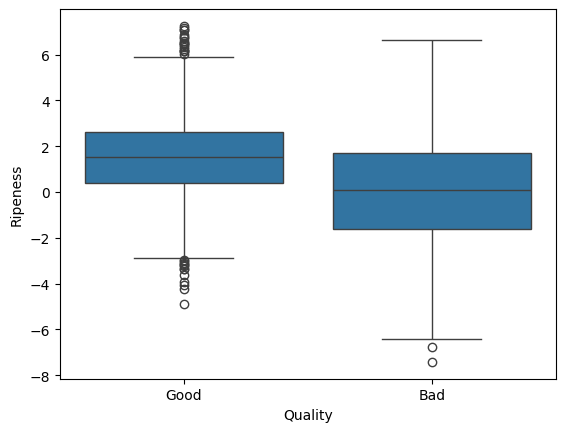

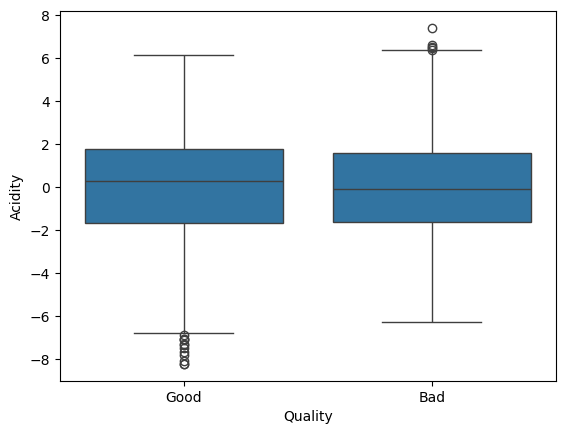

In [26]:
sns.boxplot(x='Quality', y='Size', data=df)
plt.show()
sns.boxplot(x='Quality', y='Weight', data=df)
plt.show()
sns.boxplot(x='Quality', y='Sweetness', data=df)
plt.show()
sns.boxplot(x='Quality', y='Softness', data=df)
plt.show()
sns.boxplot(x='Quality', y='HarvestTime', data=df)
plt.show()
sns.boxplot(x='Quality', y='Ripeness', data=df)
plt.show()
sns.boxplot(x='Quality', y='Acidity', data=df)
plt.show()

Membuat heatmap

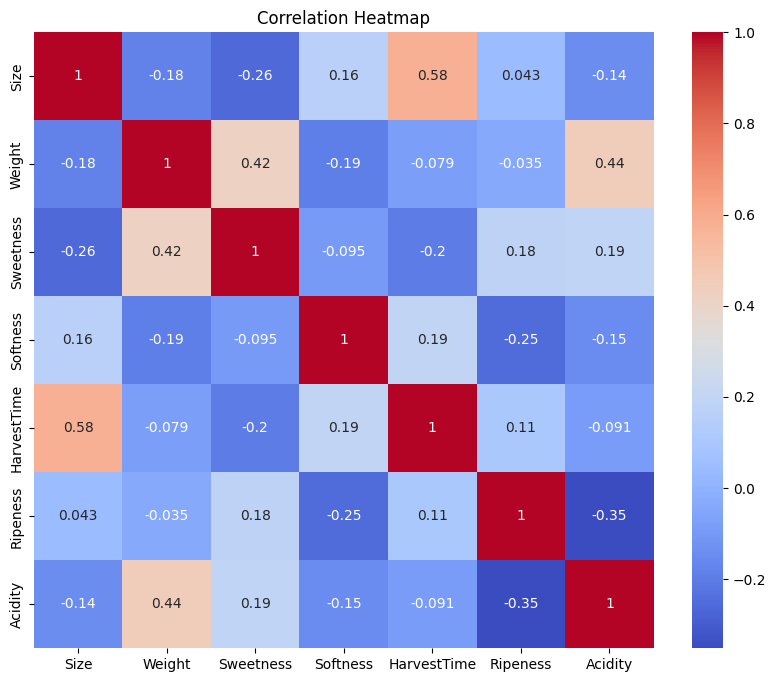

In [27]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Membuat histogram

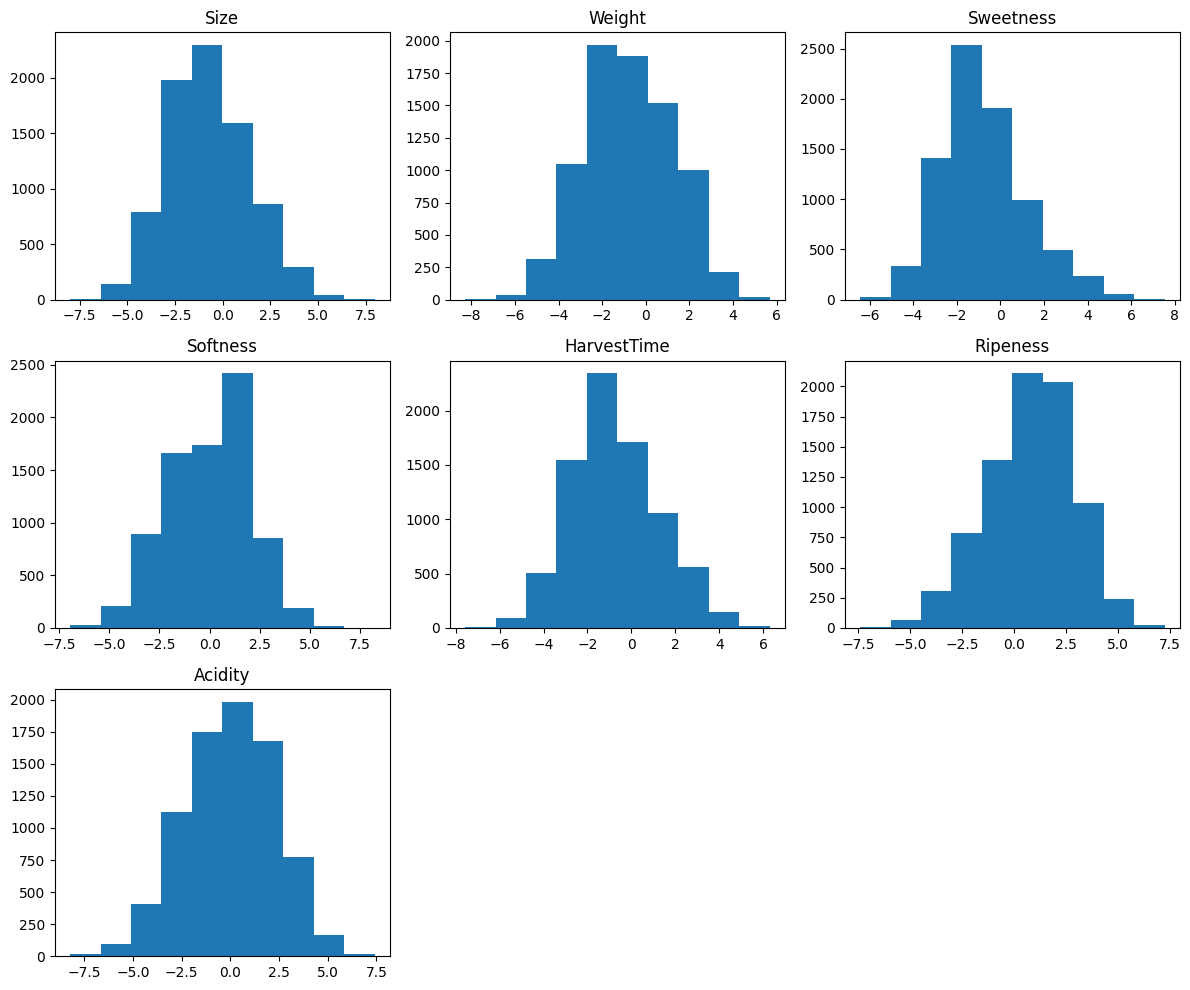

In [28]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Plot histograms for each numerical column
df[numerical_cols].hist(figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

Membuat pair chart

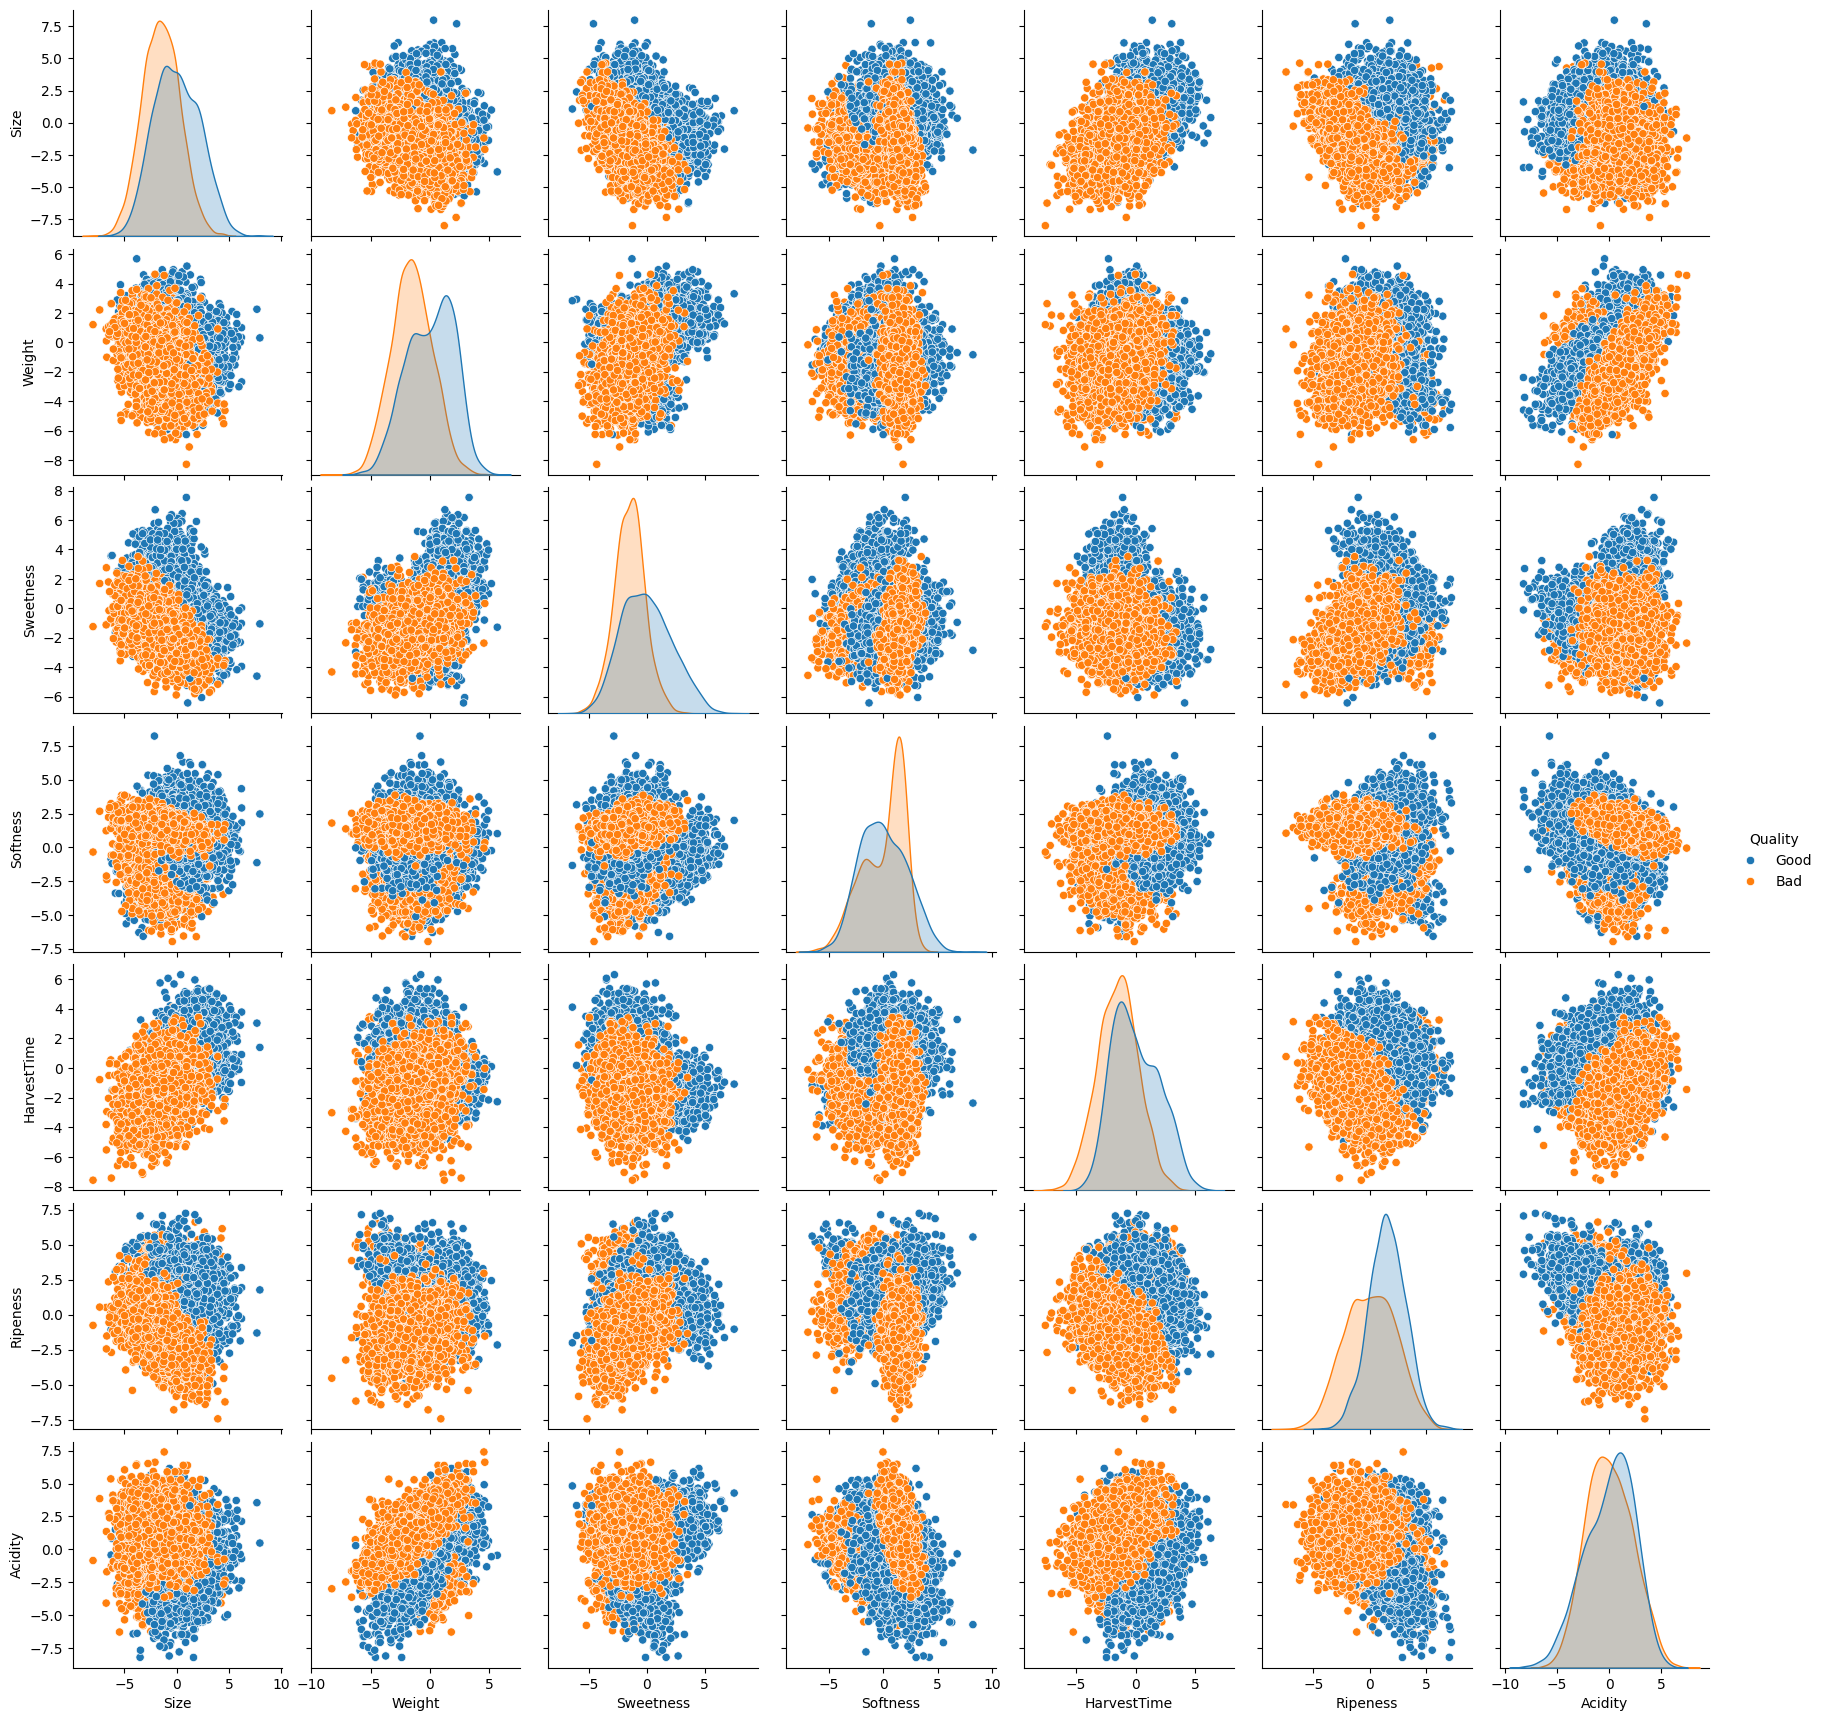

In [29]:
# Create a pair plot of numerical features, colored by 'Quality'
sns.pairplot(df.select_dtypes(include=np.number).join(df['Quality']), hue='Quality')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

- Tidak ada data kosong
- Tidak ada data duplikat
- Data sudah di standarisasi dari sumber

Encoding kolom Quality

In [30]:
label_encoder = LabelEncoder()
df['Quality_encoded'] = label_encoder.fit_transform(df['Quality'])

print(df[['Quality', 'Quality_encoded']].head())

  Quality  Quality_encoded
0    Good                1
1    Good                1
2    Good                1
3    Good                1
4    Good                1


Menghapus kolom Quality

In [31]:
df_encoded = df.drop('Quality', axis=1)

df_encoded.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality_encoded
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


Menghapus outlier

In [45]:
def remove_outliers_iqr(df):
  df_cleaned = df.copy()
  for col in df_cleaned.select_dtypes(include=np.number).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
  return df_cleaned

df_no_outlier = remove_outliers_iqr(df_encoded)

print("Shape of original dataframe:", df_encoded.shape)
print("Shape of dataframe after removing outliers:", df_no_outlier.shape)

Shape of original dataframe: (8000, 8)
Shape of dataframe after removing outliers: (7657, 8)


Melakukan radomize

In [32]:
df_no_outlier = df_encoded.sample(frac=1, random_state=42).reset_index(drop=True)
df_no_outlier.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality_encoded
0,-1.182375,-1.523354,-1.390901,-0.850838,-0.136594,2.331215,-1.828672,0
1,-2.190222,-2.809086,-1.394417,2.606318,-0.016427,5.537467,-4.940843,0
2,-0.017423,1.187556,4.757299,1.070085,-2.504751,-1.043487,2.541676,1
3,-0.266446,-1.913664,-1.837349,-1.088982,-0.487911,3.520379,-1.527580,0
4,0.247849,-3.294011,-2.369649,-0.658656,2.591410,0.169002,-2.842879,1


Simpan df_clean dengan nama cleaned_banana_quality

In [33]:
df_no_outlier.to_csv('cleaned_banana_quality.csv', index=False)